In [14]:
import pandas as pd
from prophet import Prophet
import numpy as np
import yfinance as yf
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric


In [15]:
df = yf.download('BTC-USD', start='2020-05-24', end='2024-06-03')


[*********************100%%**********************]  1 of 1 completed


In [16]:
df.head()
df.reset_index(inplace=True)
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,32518803300
1,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,31288157264
2,2020-05-26,8909.585938,8991.967773,8757.293945,8835.052734,8835.052734,29584186947
3,2020-05-27,8837.380859,9203.320312,8834.157227,9181.017578,9181.017578,32740536902
4,2020-05-28,9184.945312,9546.319336,9148.457031,9525.750977,9525.750977,34367073114
...,...,...,...,...,...,...,...
1465,2024-05-28,69392.195312,69514.640625,67227.156250,68296.218750,68296.218750,32722265965
1466,2024-05-29,68296.351562,68852.460938,67101.492188,67578.093750,67578.093750,26707072906
1467,2024-05-30,67576.085938,69500.539062,67118.078125,68364.992188,68364.992188,29509712534
1468,2024-05-31,68362.515625,68999.562500,66633.421875,67491.414062,67491.414062,27387283769


In [17]:
df = df[['Date', 'Close']]
df.tail()

,Date,Close
1465,2024-05-28,68296.218750
1466,2024-05-29,67578.093750
1467,2024-05-30,68364.992188
1468,2024-05-31,67491.414062
1469,2024-06-01,67706.937500


In [18]:
df = df.rename(columns={"Date": "ds", "Close": "y"})

In [19]:
m = Prophet(interval_width=0.75)
m.fit(df)

03:18:42 - cmdstanpy - INFO - Chain [1] start processing
03:18:42 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1830,2025-05-28
1831,2025-05-29
1832,2025-05-30
1833,2025-05-31
1834,2025-06-01


In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1830,2025-05-28,98502.141751,54764.888837,138877.651786
1831,2025-05-29,98278.032402,55605.727874,138868.561725
1832,2025-05-30,98160.775970,55178.713927,138414.873365
1833,2025-05-31,98045.804071,55420.198679,139579.446074
1834,2025-06-01,97950.295087,55334.666245,138614.414378


C:\Users\myagi\PycharmProjects\pythonProject2\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\myagi\PycharmProjects\pythonProject2\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


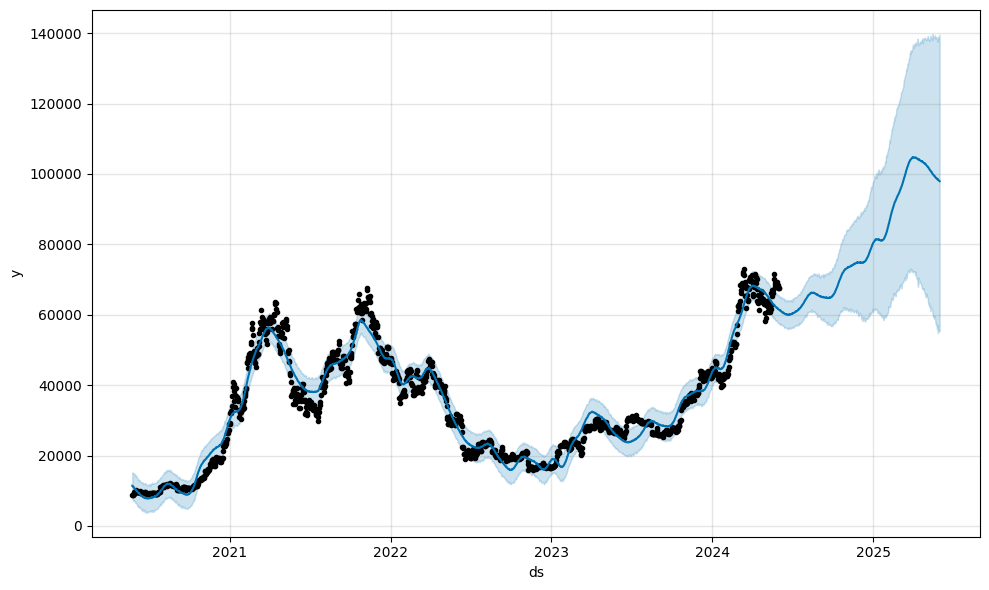

In [22]:
fig1 = m.plot(forecast)

In [23]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2020-05-24,11429.006474
1,2020-05-25,11389.501937
2,2020-05-26,11116.139006
3,2020-05-27,11092.498357
4,2020-05-28,10825.319768
...,...,...
1830,2025-05-28,98502.141751
1831,2025-05-29,98278.032402
1832,2025-05-30,98160.775970
1833,2025-05-31,98045.804071


C:\Users\myagi\PycharmProjects\pythonProject2\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\myagi\PycharmProjects\pythonProject2\.venv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\myagi\PycharmProjects\pythonProject2\.venv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing py

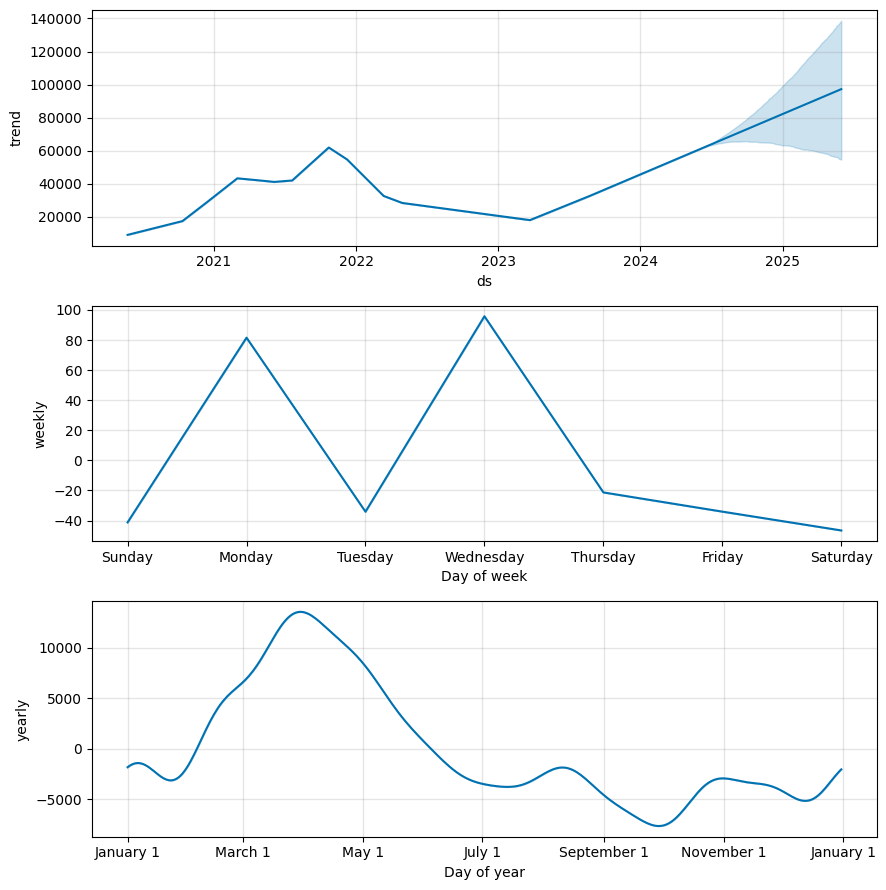

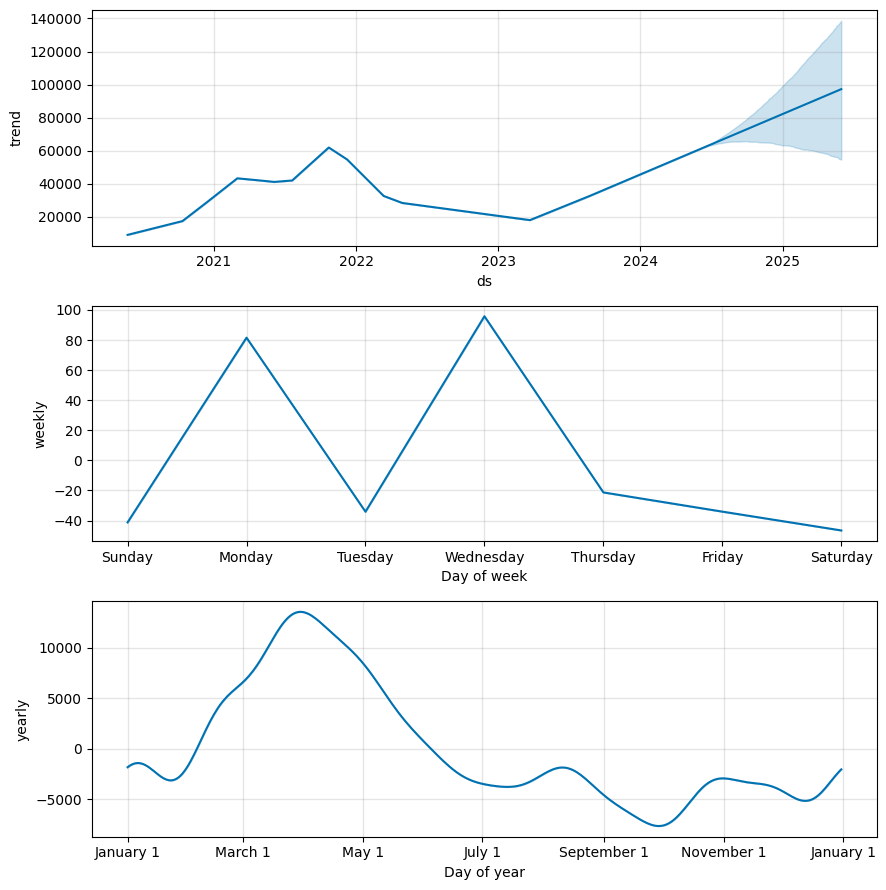

In [24]:
m.plot_components(forecast)

In [25]:
"""
df_cv = cross_validation(m, initial='365 days', period='180 days', horizon = '365 days')

# Calculate evaluation metrics
res = performance_metrics(df_cv)

res
"""

"\ndf_cv = cross_validation(m, initial='365 days', period='180 days', horizon = '365 days')\n\n# Calculate evaluation metrics\nres = performance_metrics(df_cv)\n\nres\n"

In [26]:
#plot_cross_validation_metric(df_cv, metric= 'mape')